Anotações para mentoria:
- Há forma mais eficiente de fazer plot sucessivos entre 2 features?
- Quando fazer função de features com baixa representatividade?

# Abertura dos arquivos

Configurações iniciais para iniciar exploração

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ajuda a otimizar o uso da memória (mais info: https://www.geeksforgeeks.org/garbage-collection-python/)
gc.enable()

Função para colher 1as impressões do df:

In [4]:
def summary_info_df (df):
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1])
    print ("\nFeatures : \n" ,df.columns.tolist())
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique())
    print ("\nData Types :  \n",df.dtypes)

Leitura preliminar dos arquivos

In [5]:
acquisition = pd.read_csv('data/acquisition_train.csv')
acquisition.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [8]:
summary_info_df(acquisition)

Rows     :  45000
Columns  :  43

Features : 
 ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']

Missing values :   219437

Unique values :  
 ids                                                 45000
target_

In [6]:
spend = pd.read_csv('data/spend_train.csv')
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


In [10]:
summary_info_df(spend)

Rows     :  980818
Columns  :  7

Features : 
 ['ids', 'credit_line', 'month', 'spends', 'revolving_balance', 'card_request', 'minutes_cs']

Missing values :   0

Unique values :  
 ids                   45000
credit_line           14079
month                    36
spends               277283
revolving_balance     70195
card_request              2
minutes_cs             2130
dtype: int64

Data Types :  
 ids                   object
credit_line            int64
month                  int64
spends               float64
revolving_balance    float64
card_request           int64
minutes_cs           float64
dtype: object


# EDA 

Categóricas:

- real_state, n_bankruptcies possui 2 categorias praticamente inexistentes
- channel, n_defaulted_loans só possui 1 classe realmente relevante (1)
- external_data_provider_credit_checks_last_month, external_data_provider_credit_checks_last_year, ok_since revela nada
- vale uma binzarização maior na score_3

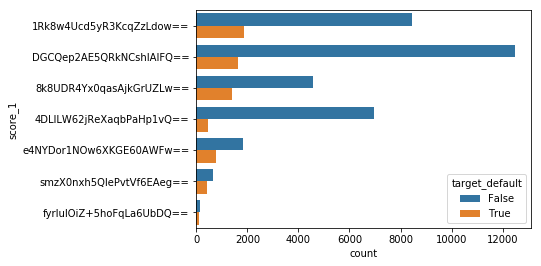

In [39]:
def catTargetPlot (cat):
    sns.countplot(y = cat, hue = 'target_default', data = acquisition)
catTargetPlot ('score_1')

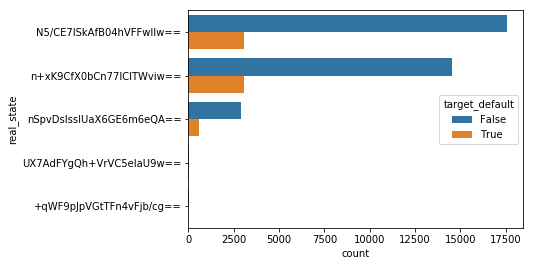

In [42]:
catTargetPlot('real_state')

Numéricas:

- score_3 é uma numérica já agrupada, mas vale agrupar mais - talvez valha tentar em todas com pouca variância na distribuição do target
- score_(4,5,6), risk_rate, n_defaulted_loans,credit_limit possuem pouco influência direta na variável
- Os scores de credito tem nenhuma tendência linear ou agrupamento em relação ao target
- reason, job_name é inusável a princípio

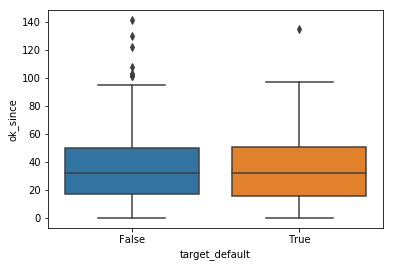

In [43]:
def numTargetPlot (num):
    sns.boxplot(y = num, x = 'target_default', data = acquisition)
numTargetPlot('ok_since')    

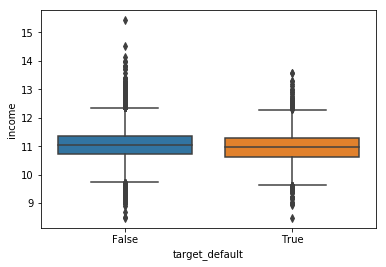

In [34]:
sns.boxplot(y = np.log(acquisition.reported_income), x = acquisition.target_default)
#acquisition.reported_income.replace([np.inf, -np.inf], np.nan)
#acquisition.reported_income.replace([np.inf, -np.inf], np.nan).describe()

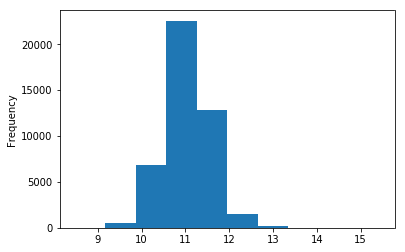

In [32]:
np.log(acquisition.reported_income).plot(kind = 'hist')

### 1.1

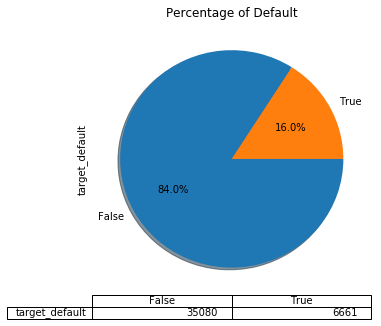

In [21]:
plt.figure(figsize=(5,5))

plt.title('Percentage of Default')
acquisition['target_default'].value_counts().plot(kind='pie', table=True, autopct='%1.1f%%',
counterclock=False, shadow=True)

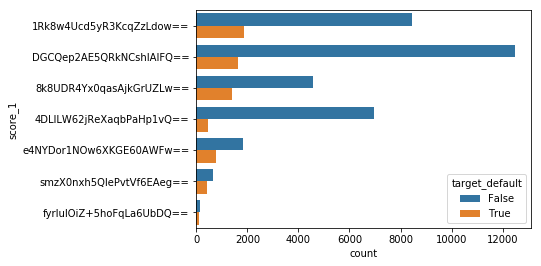

In [28]:
sns.countplot(y = 'score_1', hue = 'target_default', data = acquisition)

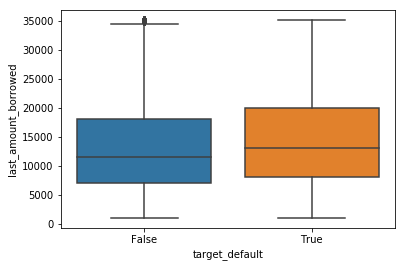

In [37]:
sns.boxplot(y = 'last_amount_borrowed', x = 'target_default', data = acquisition)

###  1.2

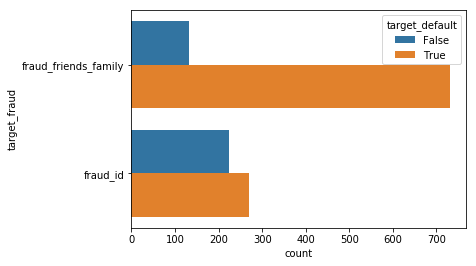

In [16]:
catTargetPlot ('target_fraud')

Boa indicação de que, talvez, não seja a melhor abordagem considerá-los um mesmo tipo apenas de fraude tendo em vista que a incidência de default é muito maior em fraud_friends_family

### 1.3

Text(0.5,1,'pv_3m')

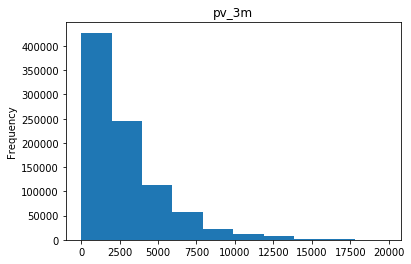

In [11]:
spend.groupby(['ids', 'credit_line']).spends.rolling(3).mean().plot(kind = 'hist')
plt.title('pv_3m')

Boa indicação de como os gastos, na média, são muito concentrados em alguns valores com uns poucos outliers, assim utilizar uma abordagem que envolva o log dos gastos pode ajudar.

# Data Cleaning

# Baseline Approach

### Definição do acquisition_bl

In [7]:
#from datetime import datetime
#datetime.strptime(acquisition.application_time_applied, '%H:%M:%S')
#acquisition.application_time_applied = acquisition.application_time_applied.map(lambda x: datetime.strptime(x, '%H:%M:%S'))
# valores como 00:60:02 inviabilizam o rolê

In [8]:
acquisition.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

In [94]:
acquisition_bl = acquisition.copy()

In [95]:
acquisition_bl.dropna(subset = ['target_default'], inplace = True)
acquisition_bl.drop(['zip', 'job_name', 'lat_lon', 'profile_phone_number', 'application_time_applied',
                     'shipping_zip_code', 'profile_tags', 'user_agent', 'reason', 'channel', 
                     'external_data_provider_first_name', 'target_fraud'], axis = 1, inplace = True)
acquisition_bl.reset_index(drop=True, inplace = True)

In [33]:
acquisition_bl.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,444,outlook.com,NaN,2,0.0,51.0,645,Invite-email,57849.0,BR-MT
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,346,gmail.com,0.0,1,0.0,17.0,243,Radio-commercial,4902.0,BR-RS
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,6,gmail.com,NaN,2,NaN,9.0,65,Waiting-list,163679.0,BR-RR
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,406,spgov.com,NaN,3,NaN,38.0,815,Waiting-list,1086.0,BR-RN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,240,gmail.com,0.0,2,1.0,46.0,320,Invite-email,198618.0,BR-MT


In [96]:
def create_dummies(df,column_names, limit = 50):
    df = df.copy()
    for feature in column_names:
        if len(df[feature].unique())>2 and len(df[feature].unique()) <= limit:
            dummies = pd.get_dummies(df[feature],prefix=feature,dummy_na=True, drop_first = False) # não sei ao certo se caga colocar true
            df = pd.concat([df,dummies],axis=1)
            df.drop(feature, axis = 1, inplace = True)
    return df

In [97]:
acquisition_ohe = create_dummies(acquisition_bl, acquisition_bl.columns)
acquisition_ohe.dtypes

ids                                                  object
target_default                                       object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
credit_limit                                        float64
income                                              float64
ok_since                                            float64
application_time_in_funnel                            int64
external_data_provider_credit_checks_last_2_year    float64
external_data_provider_email_seen_before            float64
external_data_provider_fraud_score                    int64
reported_income                                     float64
score_1_1Rk8w4Ucd5yR3KcqZzLdow==        

### Missing Values

In [98]:
acquisition_ohe.fillna(-1, inplace=True)

### DF de Propensão a gasto

In [99]:
id_spends = spend.groupby('ids').spends.mean(); id_spends.head()
spend_bl = acquisition_ohe.join(id_spends, on = 'ids', how = 'left')
spend_bl.drop(['target_default'], axis = 1, inplace = True); spend_bl.head()

,ids,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,credit_limit,income,ok_since,...,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO,shipping_state_nan,spends
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,350.0,101.800832,0.259555,108.427273,0.40,25033.92,0.0,65014.12,-1.0,...,0,0,0,0,0,0,0,0,0,853.378929
1,bc2c7502-bbad-0f8c-39c3-94e881967124,370.0,97.062615,0.942655,92.002546,0.24,-1.00,39726.0,100018.91,50.0,...,0,0,0,1,0,0,0,0,0,1257.403200
2,669630dd-2e6a-0396-84bf-455e5009c922,360.0,100.027073,0.351918,112.892453,0.29,7207.92,-1.0,65023.65,-1.0,...,0,0,1,0,0,0,0,0,0,634.263636
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,510.0,101.599485,0.987673,94.902491,0.32,-1.00,54591.0,68830.01,-1.0,...,1,0,0,0,0,0,0,0,0,3877.269231
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,500.0,98.474289,0.532539,118.126207,0.18,-1.00,-1.0,60011.29,-1.0,...,0,0,0,0,0,0,0,0,0,1373.506190


### DF de Fraude

In [100]:
n_fraud = acquisition[['ids', 'target_fraud']]
n_fraud.replace(np.nan, False, inplace = True)
n_fraud.loc[n_fraud.target_fraud != False, 'target_fraud'] = True;
fraud_bl = acquisition_ohe.merge(n_fraud, on = 'ids', how = 'left')
fraud_bl.drop('target_default', axis = 1, inplace = True) ; fraud_bl.head()

,ids,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,credit_limit,income,ok_since,...,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO,shipping_state_nan,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,350.0,101.800832,0.259555,108.427273,0.40,25033.92,0.0,65014.12,-1.0,...,0,0,0,0,0,0,0,0,0,False
1,bc2c7502-bbad-0f8c-39c3-94e881967124,370.0,97.062615,0.942655,92.002546,0.24,-1.00,39726.0,100018.91,50.0,...,0,0,0,1,0,0,0,0,0,False
2,669630dd-2e6a-0396-84bf-455e5009c922,360.0,100.027073,0.351918,112.892453,0.29,7207.92,-1.0,65023.65,-1.0,...,0,0,1,0,0,0,0,0,0,False
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,510.0,101.599485,0.987673,94.902491,0.32,-1.00,54591.0,68830.01,-1.0,...,1,0,0,0,0,0,0,0,0,False
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,500.0,98.474289,0.532539,118.126207,0.18,-1.00,-1.0,60011.29,-1.0,...,0,0,0,0,0,0,0,0,0,False


### Baseline Models

Parâmetros comuns a todo o trabalho

In [65]:
# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
seed = 666

# Quantidade de CV a serem usadas
num_folds = 10


Funções para otimizar teste de diversos modelos junto a CVs e avaliar desempenho nos dados de teste

In [154]:
# Import do módulo
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, mean_squared_error

## Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = num_folds, seed = seed, scoring = 'roc_auc', Stratified = False):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        if Stratified:
            kfold = model_selection.StratifiedKFold(n_splits = num_folds, random_state = seed)# stratified é necessário para class imbalance 
        else:
            kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
            
        cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = scoring)
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
   # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show() 
    
def eval_model_c(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted probabilities: y_pred_prob
        y_pred_prob = modelo.predict_proba(X_teste)[:,1]
        # Compute and print AUC score
        msg = "%s: %f" % (nome, roc_auc_score(y_teste, y_pred_prob))
        print(msg)

def eval_model_r(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted values
        y_pred = modelo.predict(X_teste)
        # Compute and print AUC score
        msg = "%s: %f" % (nome, mean_squared_error(y_teste, y_pred))
        print(msg)        

Tupples de algorítmos de regressão e classificação

In [175]:
## Classificação

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC # só usarei quando houver menos dimensões, senão demora demais para treinar
from xgboost import XGBClassifier

# Preparando os modelo
modelos_cla = []
modelos_cla.append(('LR', LogisticRegression()))
modelos_cla.append(('LDA', LinearDiscriminantAnalysis()))
modelos_cla.append(('NB', GaussianNB()))
modelos_cla.append(('KNN', KNeighborsClassifier()))
modelos_cla.append(('RF', RandomForestClassifier()))
#modelos.append(('SVM', SVC()))
modelos_cla.append(('XGB', XGBClassifier()))

## Regressão
# Import dos módulos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from xgboost import XGBRegressor

# Preparando os modelo
modelos_reg = []
modelos_reg.append(('LR', LinearRegression()))
modelos_reg.append(('EN', ElasticNet()))
modelos_reg.append(('KNN', KNeighborsRegressor()))
modelos_reg.append(('RF', RandomForestRegressor()))
#modelos_reg.append(('SVM', SVC()))
modelos_reg.append(('XGB', XGBRegressor()))


Descarte da Coluna 'ids' para evitar overfitting

In [101]:
for df in [acquisition_ohe, spend_bl, fraud_bl]:
    df.drop('ids', axis = 1, inplace = True)

### Risco de Crédito

Separação em Dados de Teste e Treino

In [125]:
# Separando o array em componentes de input e output
y = acquisition_ohe.iloc[:,0]
X = acquisition_ohe.iloc[:,1:]

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

Import dos módulos, escolha dos modelos e call da função

LR: 0.499977 (0.013746)
LDA: 0.708215 (0.007857)
NB: 0.546516 (0.010395)
KNN: 0.520540 (0.015356)
RF: 0.632136 (0.013955)
XGB: 0.721405 (0.008738)


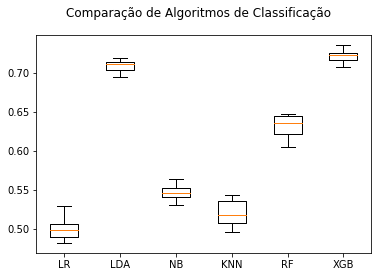

In [103]:
# Function call
compara_cv_modelos (X_treino, y_treino, modelos_cla, Stratified = True)

Score dos melhores modelos nos dados de teste

In [155]:
# func call
eval_model_c(X_treino, X_teste, y_treino, y_teste, [modelos_cla[1], modelos_cla[5]])

LDA: 0.709354
XGB: 0.725452


### Propensão a Gasto

Separação em Dados de Teste e Treino

In [75]:
# Separando o target array
y_s = spend_bl.iloc[:,-1]

# Criando os conjuntos de dados de treino e de teste
y_s_treino = y_s[y_treino.index]
y_s_teste = y_s[y_teste.index]

Import dos módulos, escolha dos modelos e call da função

LR: -4582898.282531 (75641.372760)
EN: -4553196.478693 (75020.920547)
KNN: -5471760.231433 (82268.657134)
RF: -5132396.372742 (90091.592449)
XGB: -4569303.676100 (79130.160484)


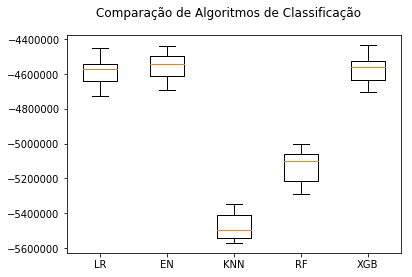

In [77]:
# Function call
compara_cv_modelos (X_treino, y_s_treino, modelos_reg, scoring = 'neg_mean_squared_error')

Score dos melhores modelos nos dados de teste

In [177]:
# func call
eval_model_r(X_treino, X_teste, y_s_treino, y_s_teste, [modelos_reg[1], modelos_reg[4]])

EN: 4616533.240179
XGB: 4631558.769294


### Risco de Fraude

Separação em Dados de Teste e Treino

In [114]:
# Separando o target array
y_f = fraud_bl.iloc[:,-1].astype('bool')

# Criando os conjuntos de dados de treino e de teste
y_f_treino = y_f[y_treino.index]
y_f_teste = y_f[y_teste.index]

Call da Função

LR: 0.486067 (0.022448)
LDA: 0.672220 (0.017662)
NB: 0.521508 (0.039543)
KNN: 0.489762 (0.008513)
RF: 0.583625 (0.027224)
XGB: 0.763352 (0.021307)


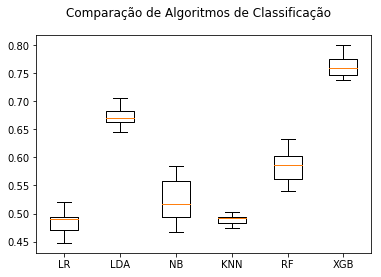

In [115]:
compara_cv_modelos (X_treino, y_f_treino, modelos_cla, Stratified = True)

Score dos melhores modelos nos dados de teste

In [178]:
# func call
eval_model_c(X_treino, X_teste, y_f_treino, y_f_teste, [modelos_cla[1], modelos_cla[5]])

LDA: 0.662103
XGB: 0.734878


# Feature Engineering

### Missing Values

In [62]:
# colunas com missing values
missingValueColumns = acquisition.columns[acquisition.isnull().any()].tolist()
acquisition_null = acquisition[missingValueColumns] 

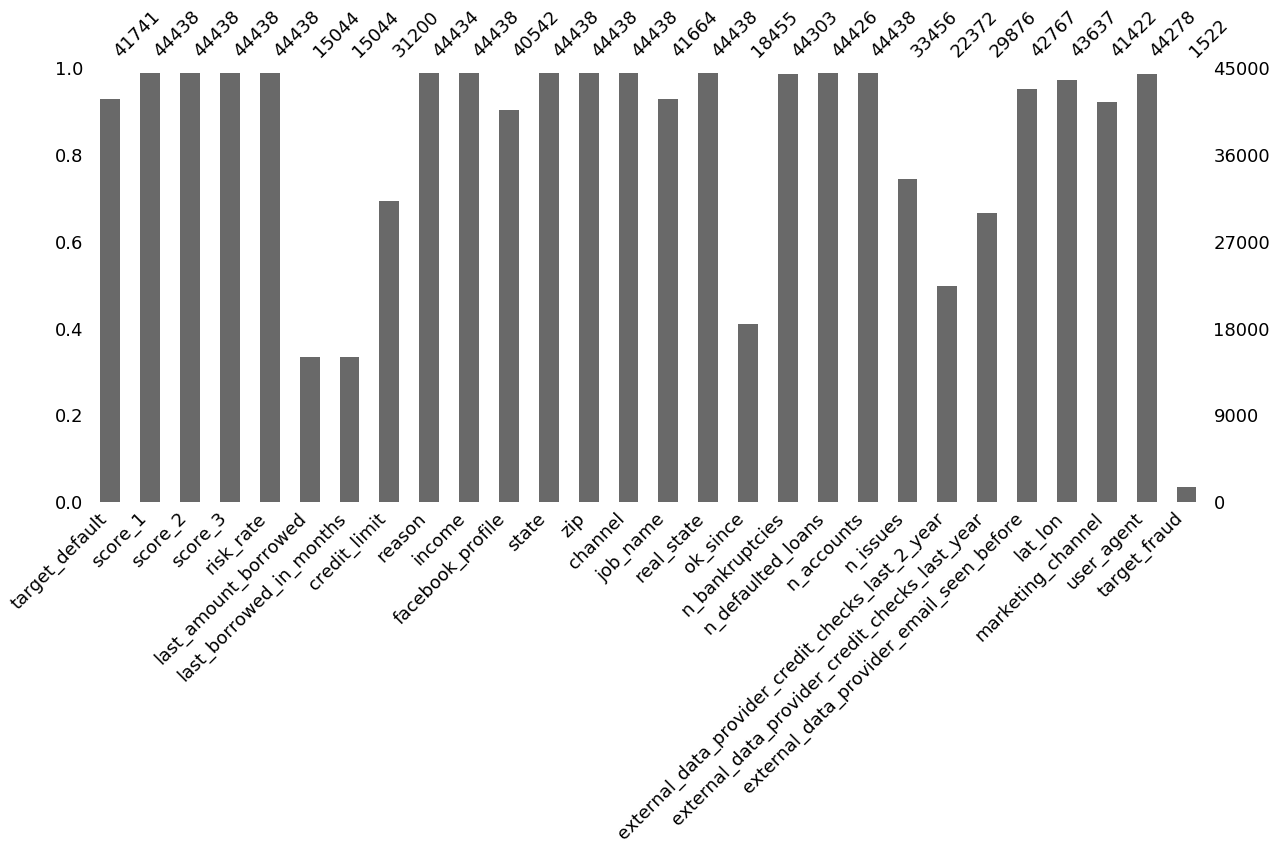

In [64]:
msno.bar(acquisition_null,figsize=(20,8),fontsize=18,labels=True)

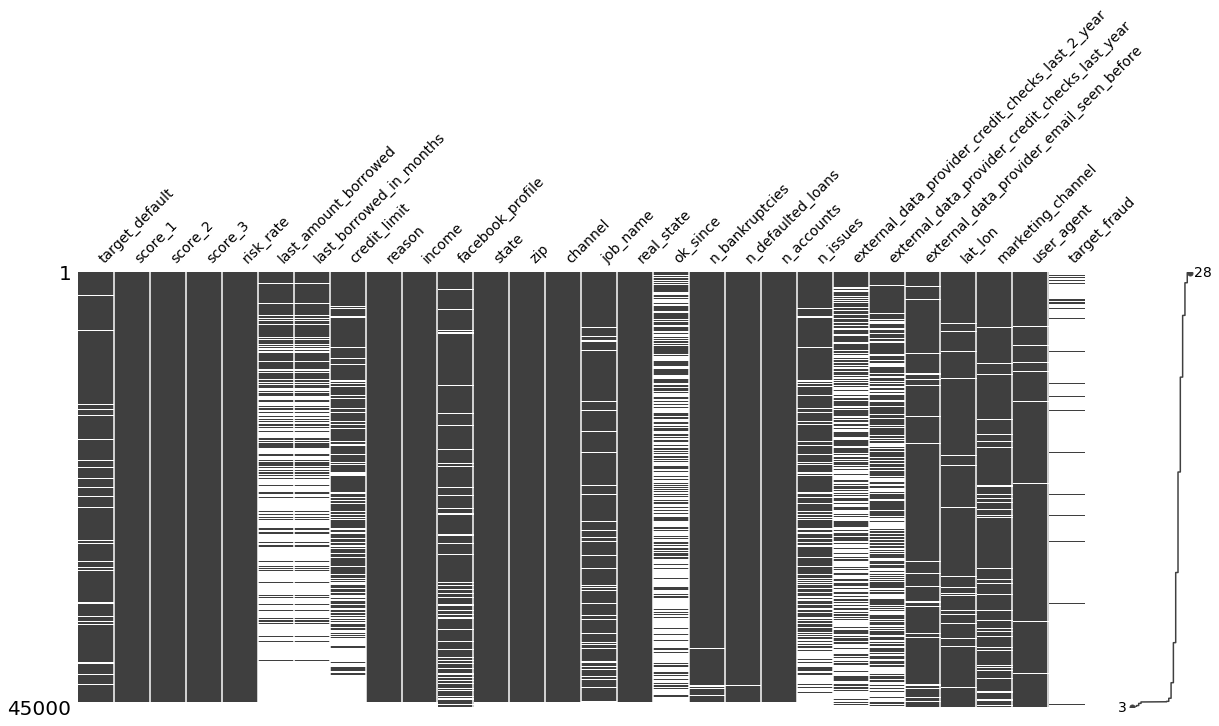

In [67]:
sorted_data = msno.nullity_sort(acquisition_null, sort='descending') # or sort='ascending'
msno.matrix(sorted_data,figsize=(20,8),fontsize=14)